In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()
#age in months
# number = number of vertebra

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


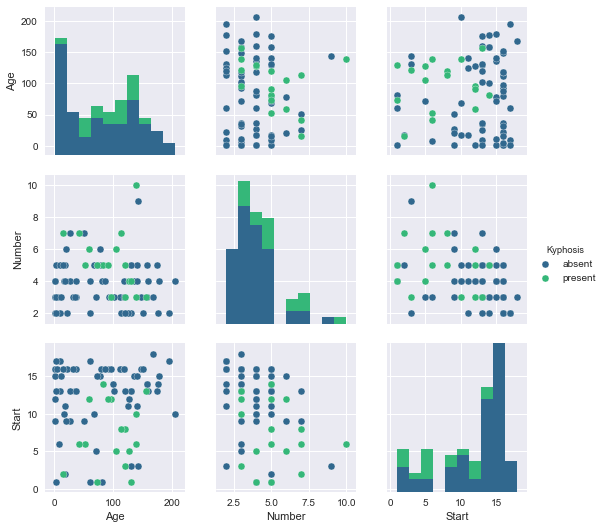

In [9]:
sns.pairplot(df, hue='Kyphosis', palette='viridis')

# Decision Tree Model

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
predictions = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, predictions))

[[18  1]
 [ 5  1]]


In [19]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     absent       0.78      0.95      0.86        19
    present       0.50      0.17      0.25         6

avg / total       0.71      0.76      0.71        25



# Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=200)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[19  0]
 [ 5  1]]


             precision    recall  f1-score   support

     absent       0.79      1.00      0.88        19
    present       1.00      0.17      0.29         6

avg / total       0.84      0.80      0.74        25

